#### Construction of Adjacency Matrix From List Of Edges

In [1]:
edges = []
file_name="graphdata3.txt"
with open(file_name, "r") as file:
    num_vertices = int(file.readline().strip())
    num_edges = int(file.readline().strip())
    edges = [tuple(map(int, line.strip().split())) for line in file]
adjacency_matrix = [[0] * num_vertices for _ in range(num_vertices)]
for edge in edges:
    vertex1, vertex2 = edge
    adjacency_matrix[vertex1-1][vertex2-1] = 1
    adjacency_matrix[vertex2-1][vertex1-1] = 1
print("Adjacency Matrix:")
for row in adjacency_matrix:
    print(row)


Adjacency Matrix:
[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]
[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]


#### Visualizing Graph using NetworkX and Matplotlib

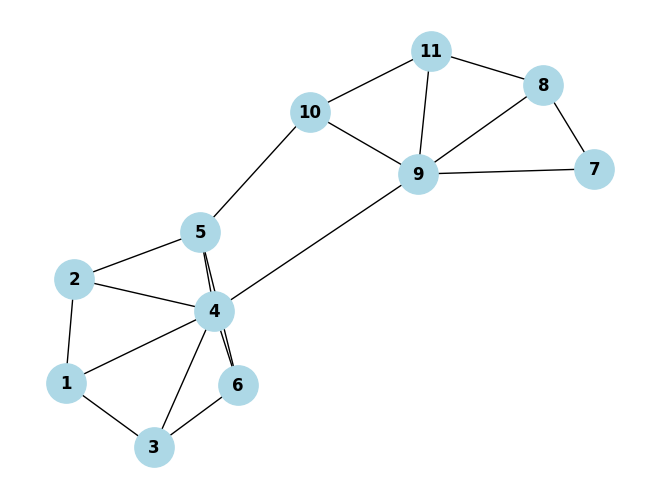

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
graph = nx.Graph(np.array(adjacency_matrix))
graph = nx.relabel_nodes(graph, {i: i + 1 for i in graph.nodes()})
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=800,font_weight='bold')
plt.show()

#### Computing the Laplacian Matrix

In [3]:
degree_matrix = np.zeros((num_vertices, num_vertices))
for i in range(num_vertices):
    degree_matrix[i][i] = sum(adjacency_matrix[i])
laplacian_matrix = degree_matrix - np.array(adjacency_matrix)
print("Laplacian Matrix:")
for row in laplacian_matrix:
    print(row)

Laplacian Matrix:
[ 3. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.]
[-1.  3.  0. -1. -1.  0.  0.  0.  0.  0.  0.]
[-1.  0.  3. -1.  0. -1.  0.  0.  0.  0.  0.]
[-1. -1. -1.  6. -1. -1.  0.  0. -1.  0.  0.]
[ 0. -1.  0. -1.  4. -1.  0.  0.  0. -1.  0.]
[ 0.  0. -1. -1. -1.  3.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  2. -1. -1.  0.  0.]
[ 0.  0.  0.  0.  0.  0. -1.  3. -1.  0. -1.]
[ 0.  0.  0. -1.  0.  0. -1. -1.  5. -1. -1.]
[ 0.  0.  0.  0. -1.  0.  0.  0. -1.  3. -1.]
[ 0.  0.  0.  0.  0.  0.  0. -1. -1. -1.  3.]


#### Eigenvalues and Eigenvectors of the Laplacian of the Graph

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
print(f"Eigenvalues: {eigenvalues}")
print()
for i in range(len(eigenvectors)):
    print(f"Eigenvalue {i+1}: {eigenvectors[:, i]}")
    print()

Eigenvalues: [7.43544444e+00 5.98276311e-17 4.98912762e-01 1.81781461e+00
 2.38196601e+00 2.66158387e+00 3.38722078e+00 4.61803399e+00
 4.44159306e+00 5.46416867e+00 5.29326182e+00]

Eigenvalue 1: [-0.12839652 -0.10337055 -0.12839652  0.80126271 -0.21437187 -0.10337055
  0.07267822  0.0772237  -0.4722621   0.14194102  0.05706246]

Eigenvalue 2: [0.30151134 0.30151134 0.30151134 0.30151134 0.30151134 0.30151134
 0.30151134 0.30151134 0.30151134 0.30151134 0.30151134]

Eigenvalue 3: [-0.32480751 -0.28146928 -0.32480751 -0.20609512 -0.17307661 -0.28146928
  0.43964223  0.40805837  0.25188297  0.16307737  0.32906437]

Eigenvalue 4: [-0.2082915  -0.00395026 -0.2082915  -0.03399741  0.23761898 -0.00395026
 -0.60886618 -0.1556076   0.04468108  0.56042659  0.38022807]

Eigenvalue 5: [ 3.71748034e-01  6.01500955e-01 -3.71748034e-01  8.09995579e-16
  1.25146231e-15 -6.01500955e-01  1.93111684e-15 -1.23038878e-15
 -9.55005400e-16 -9.88571701e-17 -2.50734892e-15]

Eigenvalue 6: [-0.40876933  0.242

#### Algebraic Connctivity and Fielder Vector

In [5]:
eigenvalues_sorted = np.sort(eigenvalues)
eigenvectors_sorted = eigenvectors[:, eigenvalues.argsort()]
alg_multiplicity = eigenvalues_sorted[1]
fielder_vector = eigenvectors_sorted[:, 1]
print("Algebraic Connectivity:", alg_multiplicity)
print("Fielder Vector:")
print(fielder_vector)

Algebraic Connectivity: 0.4989127621389826
Fielder Vector:
[-0.32480751 -0.28146928 -0.32480751 -0.20609512 -0.17307661 -0.28146928
  0.43964223  0.40805837  0.25188297  0.16307737  0.32906437]


#### Number of Possible Spanning Trees

In [6]:
eigenvalues_x = eigenvalues_sorted[1:]
product = np.prod(eigenvalues_x)/3
print("Number of Spanning Trees, calculated using eigenvalues:", round(product))

from scipy.linalg import det
spanning_trees_count = det(laplacian_matrix[1:, 1:])
print("Number of Spanning Trees, calculated using Kirchoff's Theorem:",spanning_trees_count)

Number of Spanning Trees, calculated using eigenvalues: 28637
Number of Spanning Trees, calculated using Kirchoff's Theorem: 7809.999999999997


#### Number of Connected Components

In [7]:
tolerance = 1e-12
zero_eigenvalues_count = np.sum(np.abs(eigenvalues) < tolerance)
print("Number of Connected Components in the graph are:", zero_eigenvalues_count)

def dfs(graph, start, visited, component):
    visited.add(start)
    component.append(start)
    for neighbor in graph.neighbors(start):
        if neighbor not in visited:
            dfs(graph, neighbor, visited, component)
connected_components = []
visited = set()
for node in graph.nodes():
    if node not in visited:
        component = []
        dfs(graph, node, visited, component)
        connected_components.append(component)
print("Connected Components:")
for i, component in enumerate(connected_components):
    print(f"Component {i + 1}: {component}")



Number of Connected Components in the graph are: 1
Connected Components:
Component 1: [1, 2, 4, 3, 6, 5, 10, 9, 7, 8, 11]
